<a href="https://colab.research.google.com/github/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/2_vgg/4)%20Comparing%20a%20vgg%20network%20across%20backend%20-%20mxnet%2C%20pytorch%20and%20keras%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goals



### Train classifier using vgg in different backends - mxnet, pytorch, and keras on intel-image-classification dataset


# What is vgg

## Readings on vgg

  1) Points from https://towardsdatascience.com/vgg-neural-networks-the-next-step-after-alexnet-3f91fa9ffe2c
    - VGG addresses another very important aspect of CNNs: depth
    - All of VGG’s hidden layers use ReLU
    - Unlike 11x11 kernels of alexnet, it uses smaller ones 1x1 and 3x3 kernels


  2) Points from https://becominghuman.ai/what-is-the-vgg-neural-network-a590caa72643
    - Intuitively, more layer is better. However, the authors found that VGG-16 is better than VGG-19
    - Authors introduce multi-scale evaluationin the paper
  
  
  3) Read more here - 
    - https://arxiv.org/abs/1409.1556
    - https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/
    - https://www.cs.toronto.edu/~frossard/post/vgg16/
    - https://d2l.ai/chapter_convolutional-modern/vgg.html


# Table of Contents


## [0. Install](#0)


## [1. Train and validate vgg16 base architecture in mxnet backend](#1)


## [2. Train and validate vgg16 base architecture in pytorch backend](#2)


## [3. Train and validate vgg16 base architecture in keras backend](#3)


## [4. Compare experiments 1 and 2](#4)





<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [5]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 200, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (146/146), done.
remote: Total 2105 (delta 110), reused 116 (delta 53), pack-reused 1905
Receiving objects: 100% (2105/2105), 73.71 MiB | 4.39 MiB/s, done.
Resolving deltas: 100% (1130/1130), done.


In [ ]:
# Select the requirements file as per OS and CUDA version
!cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt

## Dataset - Intel Image Classification
    - https://www.kaggle.com/puneet6060/intel-image-classification

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Ew1ueuspWHKKLykoKV3KTRaEl_sQZ4tt' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Ew1ueuspWHKKLykoKV3KTRaEl_sQZ4tt" -O intel-image-classification.zip && rm -rf /tmp/cookies.txt

In [2]:
! unzip -qq intel-image-classification.zip

# Imports

In [1]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

<a id='1'></a>
# Load experiment with vgg-16 base architecture in mxnet backend

In [3]:
#Using mxnet-gluon backend 
from gluon_prototype import prototype

In [6]:
# Load experiment

gtf = prototype(verbose=1);
gtf.Prototype("Compare-vgg-backends", "vgg-16-mxnet");


# Insert data and set params in default mode
gtf.Default(dataset_path="intel-image-classification/seg_train/seg_train", 
            model_name="vgg16", 
            freeze_base_network=False,
            num_epochs=5);

Mxnet Version: 1.5.0

Experiment Details
    Project: Compare-vgg-backends
    Experiment: vgg-16-mxnet
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-backends/vgg-16-mxnet/

Dataset Details
    Train path:     intel-image-classification/seg_train/seg_train
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 9823
    Num val images

monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


In [7]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.001
    [Epoch 1] Train-acc: 0.886, Train-loss: 0.329 | Val-acc: 0.919972, Val-loss: 0.228, | time: 204.5 sec

    Epoch 2/5
    ----------




    curr_lr - 0.00098
    [Epoch 2] Train-acc: 0.931, Train-loss: 0.194 | Val-acc: 0.928995, Val-loss: 0.212, | time: 219.6 sec

    Epoch 3/5
    ----------




    curr_lr - 0.0009603999999999999
    [Epoch 3] Train-acc: 0.944, Train-loss: 0.163 | Val-acc: 0.936357, Val-loss: 0.191, | time: 223.3 sec

    Epoch 4/5
    ----------




    curr_lr - 0.0009411919999999999
    [Epoch 4] Train-acc: 0.952, Train-loss: 0.133 | Val-acc: 0.931370, Val-loss: 0.201, | time: 214.5 sec

    Epoch 5/5
    ----------




    curr_lr - 0.0009223681599999998
    [Epoch 5] Train-acc: 0.962, Train-loss: 0.111 | Val-acc: 0.937070, Val-loss: 0.179, | time: 221.0 sec

    Training completed in: 17m 36s
    Best val Acc:          0.937070

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-backends/vgg-16-mxnet/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-backends/vgg-16-mxnet/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training a

<Figure size 432x288 with 0 Axes>

In [8]:
# Load for validation

gtf = prototype(verbose=1);
gtf.Prototype("Compare-vgg-backends", "vgg-16-mxnet", eval_infer=True);


# Set dataset
gtf.Dataset_Params(dataset_path="intel-image-classification/seg_test/seg_test");
gtf.Dataset();


# Validate
accuracy, class_based_accuracy = gtf.Evaluate();

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/Compare-vgg-backends/vgg-16-mxnet/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Compare-vgg-backends
    Experiment: vgg-16-mxnet
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-backends/vgg-16-mxnet/

Dataset Details
    Test path:      intel-image-classification/seg_test/seg_test
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 3000
    Num classes:      6

Testing



    Result
        class based accuracies
            0. buildings - 94.27917620137299 %
            1. forest - 99.78902953586498 %
            2. glacier - 87.88426763110307 %
            3. mountain - 87.80952380952381 %
            4. sea - 97.45098039215686 %
            5. street - 92.21556886227546 %
        total images:            3000
        num correct predictions: 2791
        Average accuracy (%):    93.03333333333333



<a id='2'></a>
# Load experiment with vgg-16 base architecture in pytorch backend

In [1]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [2]:
#Using pytorch backend 
from pytorch_prototype import prototype

In [3]:
# Load experiment

gtf = prototype(verbose=1);
gtf.Prototype("Compare-vgg-backends", "vgg-16-pytorch");


# Insert data and set params in default mode
gtf.Default(dataset_path="intel-image-classification/seg_train/seg_train", 
            model_name="vgg16", 
            freeze_base_network=False,
            num_epochs=5);

Pytorch Version: 1.2.0

Experiment Details
    Project: Compare-vgg-backends
    Experiment: vgg-16-pytorch
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-backends/vgg-16-pytorch/

Dataset Details
    Train path:     intel-image-classification/seg_train/seg_train
    Val path:       None
    CSV train path: None
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 9823
    Num val ima

In [12]:
#Estimate Training time
gtf.Estimate_Train_Time();

Training time estimate
    5 Epochs: Approx. 21 Min



In [4]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.835, Train-loss: 0.472 | Val-acc: 0.900736, Val-loss: 0.291, | time: 234.7 sec

    Epoch 2/5
    ----------




    curr_lr - 0.01
    [Epoch 2] Train-acc: 0.911, Train-loss: 0.259 | Val-acc: 0.905486, Val-loss: 0.290, | time: 243.0 sec

    Epoch 3/5
    ----------




    curr_lr - 0.01
    [Epoch 3] Train-acc: 0.932, Train-loss: 0.200 | Val-acc: 0.911422, Val-loss: 0.282, | time: 242.8 sec

    Epoch 4/5
    ----------




    curr_lr - 0.01
    [Epoch 4] Train-acc: 0.942, Train-loss: 0.163 | Val-acc: 0.916172, Val-loss: 0.260, | time: 242.5 sec

    Epoch 5/5
    ----------




    curr_lr - 0.01
    [Epoch 5] Train-acc: 0.952, Train-loss: 0.140 | Val-acc: 0.922109, Val-loss: 0.238, | time: 241.8 sec

    Training completed in: 19m 36s
    Best val Acc:          0.922109

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-backends/vgg-16-pytorch/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-backends/vgg-16-pytorch/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy histo

<Figure size 432x288 with 0 Axes>

In [5]:
# Load for validation

gtf = prototype(verbose=1);
gtf.Prototype("Compare-vgg-backends", "vgg-16-pytorch", eval_infer=True);


# Set dataset
gtf.Dataset_Params(dataset_path="intel-image-classification/seg_test/seg_test");
gtf.Dataset();


# Validate
accuracy, class_based_accuracy = gtf.Evaluate();

Pytorch Version: 1.2.0

Model Details
    Loading model - workspace/Compare-vgg-backends/vgg-16-pytorch/output/models/final
    Model loaded!

Experiment Details
    Project: Compare-vgg-backends
    Experiment: vgg-16-pytorch
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-backends/vgg-16-pytorch/

Dataset Details
    Test path:     intel-image-classification/seg_test/seg_test
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 3000
    Num classes:      6

Testing



    Result
        class based accuracies
            0. buildings - 90.16018306636155 %
            1. forest - 99.15611814345992 %
            2. glacier - 84.08679927667269 %
            3. mountain - 87.80952380952381 %
            4. sea - 95.49019607843138 %
            5. street - 96.40718562874252 %
        total images:            3000
        num correct predictions: 2760
        Average accuracy (%):    92.0



<a id='3'></a>
# Load experiment with vgg-16 base architecture in keras backend

In [2]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [3]:
#Using keras backend 
from keras_prototype import prototype

In [4]:
# Load experiment

gtf = prototype(verbose=1);
gtf.Prototype("Compare-vgg-backends", "vgg-16-keras");


# Insert data and set params in default mode
gtf.Default(dataset_path="intel-image-classification/seg_train/seg_train", 
            model_name="vgg16", 
            freeze_base_network=False,
            num_epochs=5);

Keras Version: 2.2.5
Tensorflow Version: 1.12.0

Experiment Details
    Project: Compare-vgg-backends
    Experiment: vgg-16-keras
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-backends/vgg-16-keras/

Dataset Details
    Train path:     intel-image-classification/seg_train/seg_train
    Val path:       None
    CSV train path: None
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Found 9826 images belonging to 6 classes.
Found 4208 images belonging to 6 classes.
Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

D

In [5]:
#Estimate Training time
gtf.Estimate_Train_Time();

Found 1408 images belonging to 6 classes.
Training time estimate
    5 Epochs: Approx. 26 Min



In [6]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
Epoch 1/5
2456/2456 [==============================] - 191s 78ms/step - loss: 0.4903 - acc: 0.8360 - val_loss: 0.2767 - val_acc: 0.9009

Epoch 00001: saving model to workspace/Compare-vgg-backends/vgg-16-keras/output/models/resume_state.h5

Epoch 00001: val_loss improved from inf to 0.27668, saving model to workspace/Compare-vgg-backends/vgg-16-keras/output/models/best_model.h5

Epoch 00001: saving model to workspace/Compare-vgg-backends/vgg-16-keras/output/models/intermediate_model_01.h5
Epoch 2/5
2456/2456 [==============================] - 193s 79ms/step - loss: 0.2896 - acc: 0.9001 - val_loss: 0.2387 - val_acc: 0.9173

Epoch 00002: saving model to workspace/Compare-vgg-backends/vgg-16-keras/output/models/resume_state.h5

Epoch 00002: val_loss improved from 0.27668 to 0.23873, saving model to workspace/Compare-vgg-backends/vgg-16-keras/output/models/best_model.h5

Epoch 00002: saving model to workspace/Compare-vgg-backends/vgg-16-keras/output/models/intermediate_model

<Figure size 432x288 with 0 Axes>

In [7]:
# Load for validation

gtf = prototype(verbose=1);
gtf.Prototype("Compare-vgg-backends", "vgg-16-keras", eval_infer=True);


# Set dataset
gtf.Dataset_Params(dataset_path="intel-image-classification/seg_test/seg_test");
gtf.Dataset();


# Validate
accuracy, class_based_accuracy = gtf.Evaluate();

Keras Version: 2.2.5
Tensorflow Version: 1.12.0

Model Details
    Loading model - workspace/Compare-vgg-backends/vgg-16-keras/output/models/final.h5
    Model loaded!

Experiment Details
    Project: Compare-vgg-backends
    Experiment: vgg-16-keras
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-backends/vgg-16-keras/

Dataset Details
    Test path:     intel-image-classification/seg_test/seg_test
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Found 3000 images belonging to 6 classes.
Pre-Composed Test Transforms
[{'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num test images: 3000
    Num classes:      6

Testing
3000/3000 [==============================] - 26s 9ms/step

    Result
        class based accuracies
            0. buildings - 88

<a id='11'></a>
# Comparing all the experiments

In [8]:
# Invoke the comparison class
from compare_prototype import compare

### Creating and managing comparison experiments
        - Provide project name

In [9]:
# Create a project 
gtf = compare(verbose=1);
gtf.Comparison("Compare-effect-of-backend");

Comparison: - Compare-effect-of-backend


### This creates files and directories as per the following structure
    
    workspace
        |
        |--------comparison
                        |
                        |
                        |-----Compare-effect-of-backend
                                    |
                                    |------stats_best_val_acc.png
                                    |------stats_max_gpu_usage.png
                                    |------stats_training_time.png
                                    |------train_accuracy.png
                                    |------train_loss.png
                                    |------val_accuracy.png
                                    |------val_loss.png
                                    
                        |
                        |-----comparison.csv (Contains necessary details of all experiments)

### Add the experiments
        - First argument - Project name
        - Second argument - Experiment name

In [10]:
gtf.Add_Experiment("Compare-vgg-backends", "vgg-16-mxnet");
gtf.Add_Experiment("Compare-vgg-backends", "vgg-16-pytorch");
gtf.Add_Experiment("Compare-vgg-backends", "vgg-16-keras");

Project - Compare-vgg-backends, Experiment - vgg-16-mxnet added
Project - Compare-vgg-backends, Experiment - vgg-16-pytorch added
Project - Compare-vgg-backends, Experiment - vgg-16-keras added


## Run Analysis

In [11]:
gtf.Generate_Statistics();

Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

## Visualize and study comparison metrics

### Training Accuracy Curves

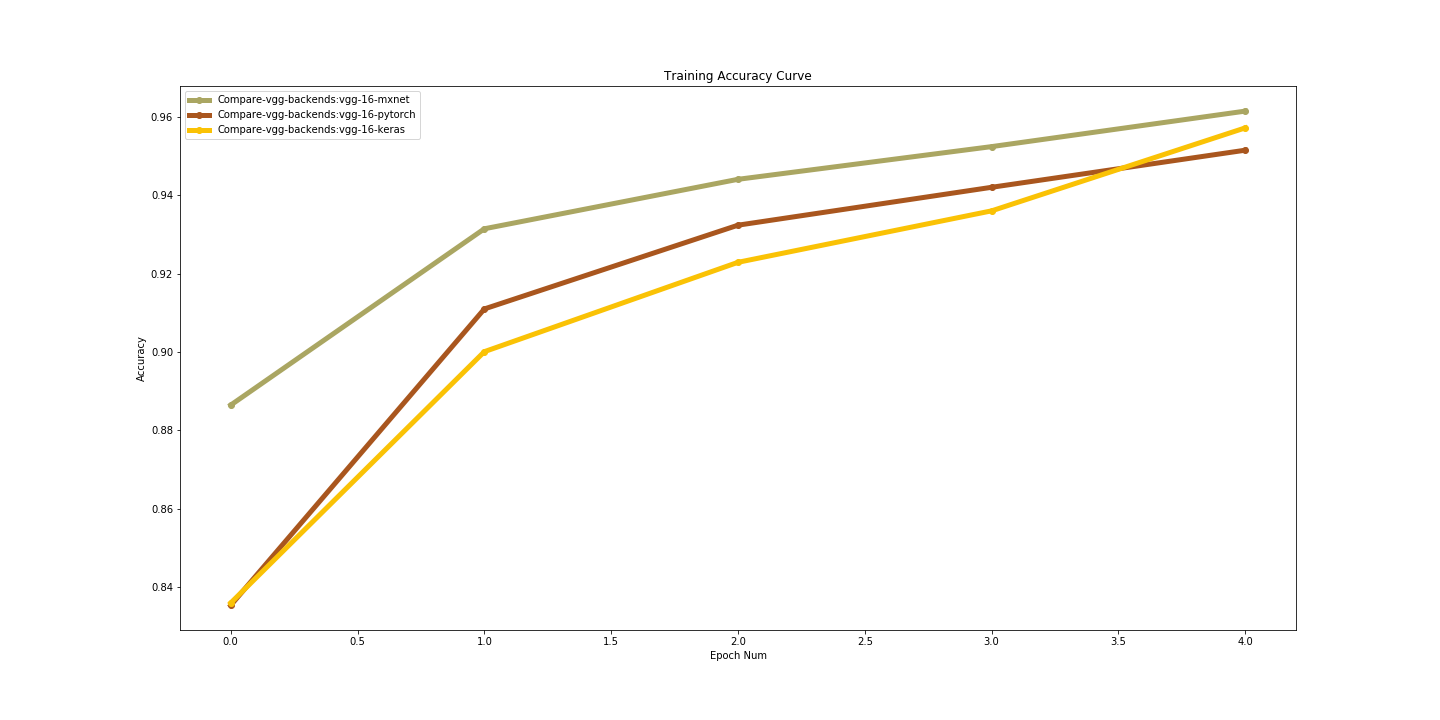

In [12]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-backend/train_accuracy.png") 

### Training Loss Curves

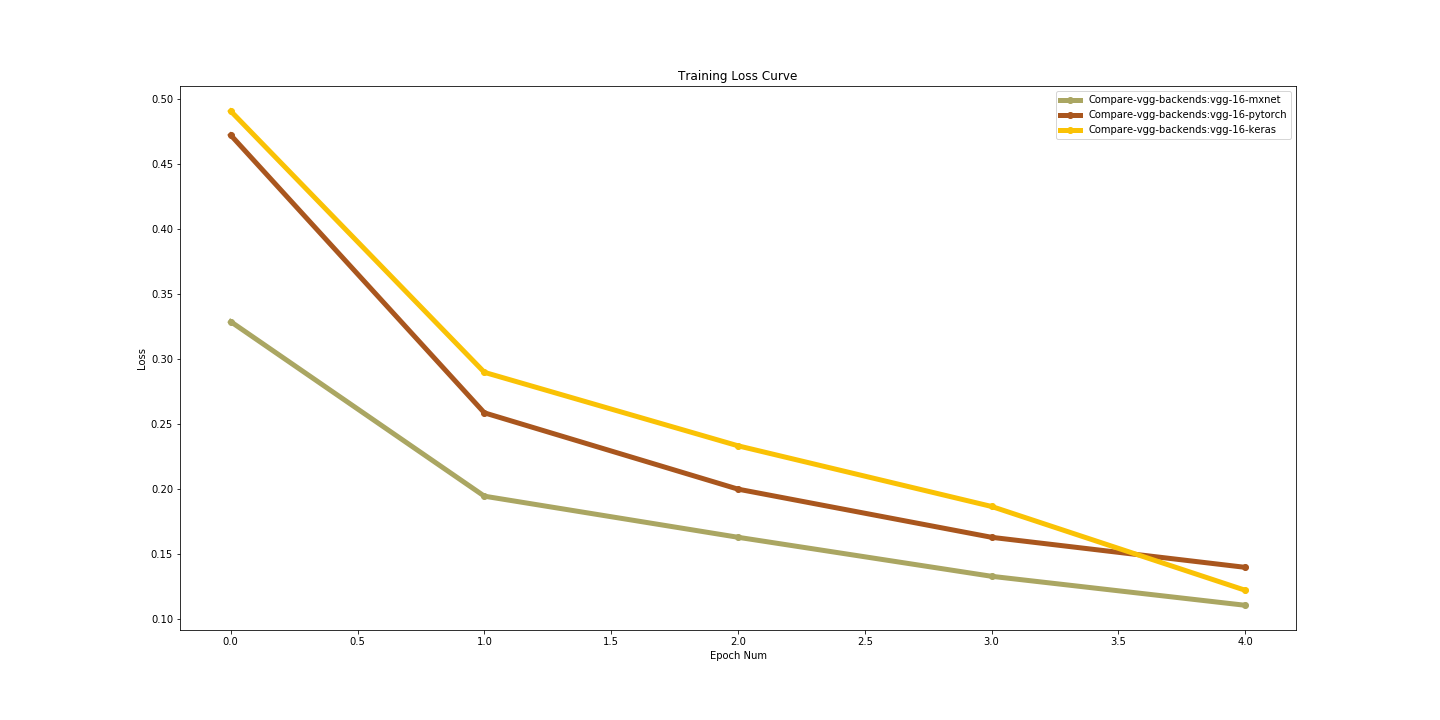

In [13]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-backend/train_loss.png") 

### Validation Accuracy Curves

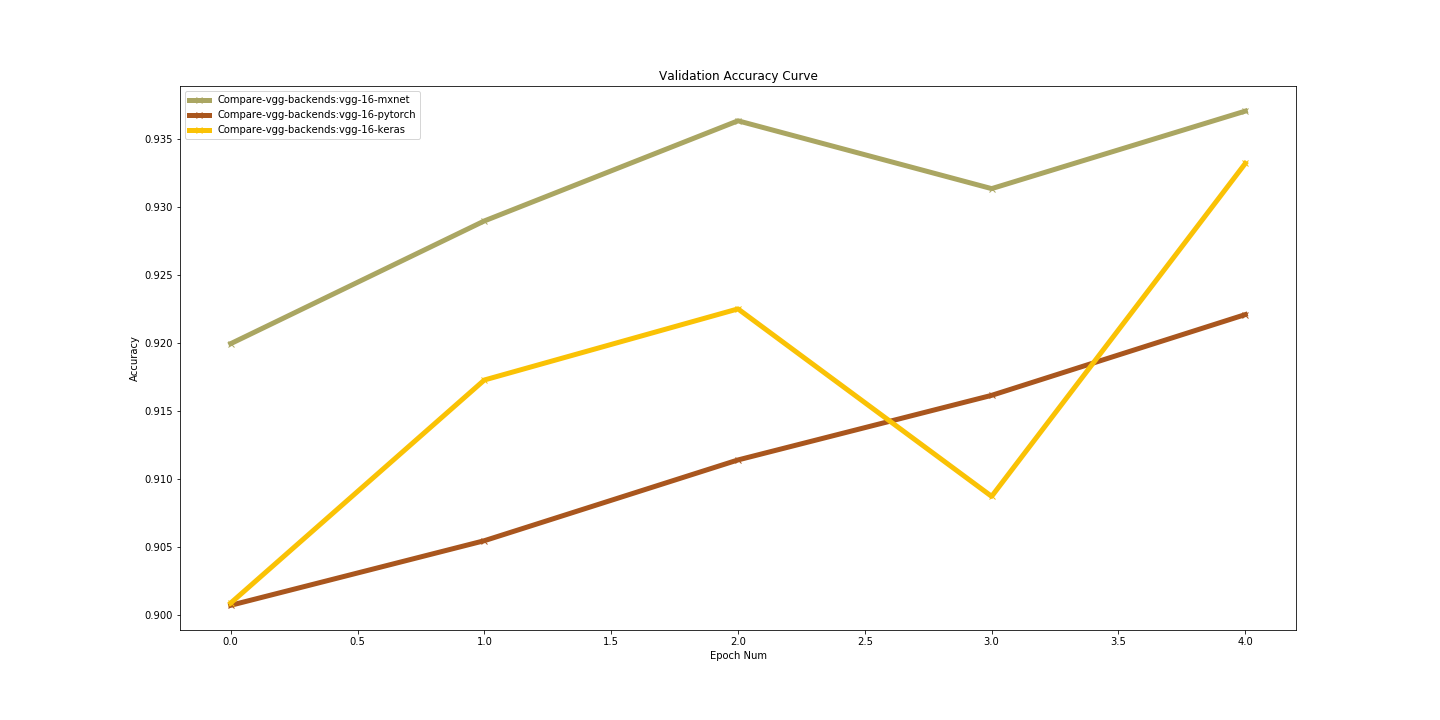

In [14]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-backend/val_accuracy.png") 

### Validation loss curves

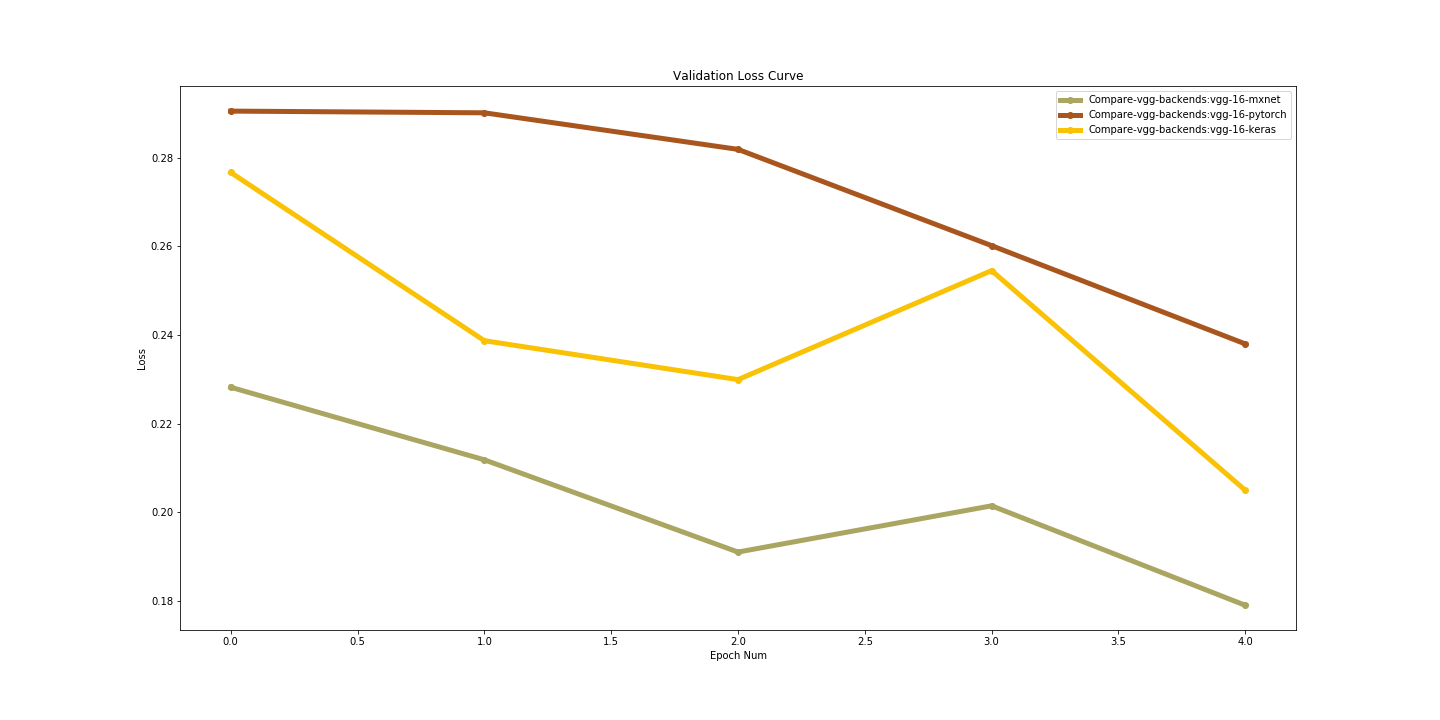

In [15]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-backend/val_loss.png") 

### Training Times and max gpu usages

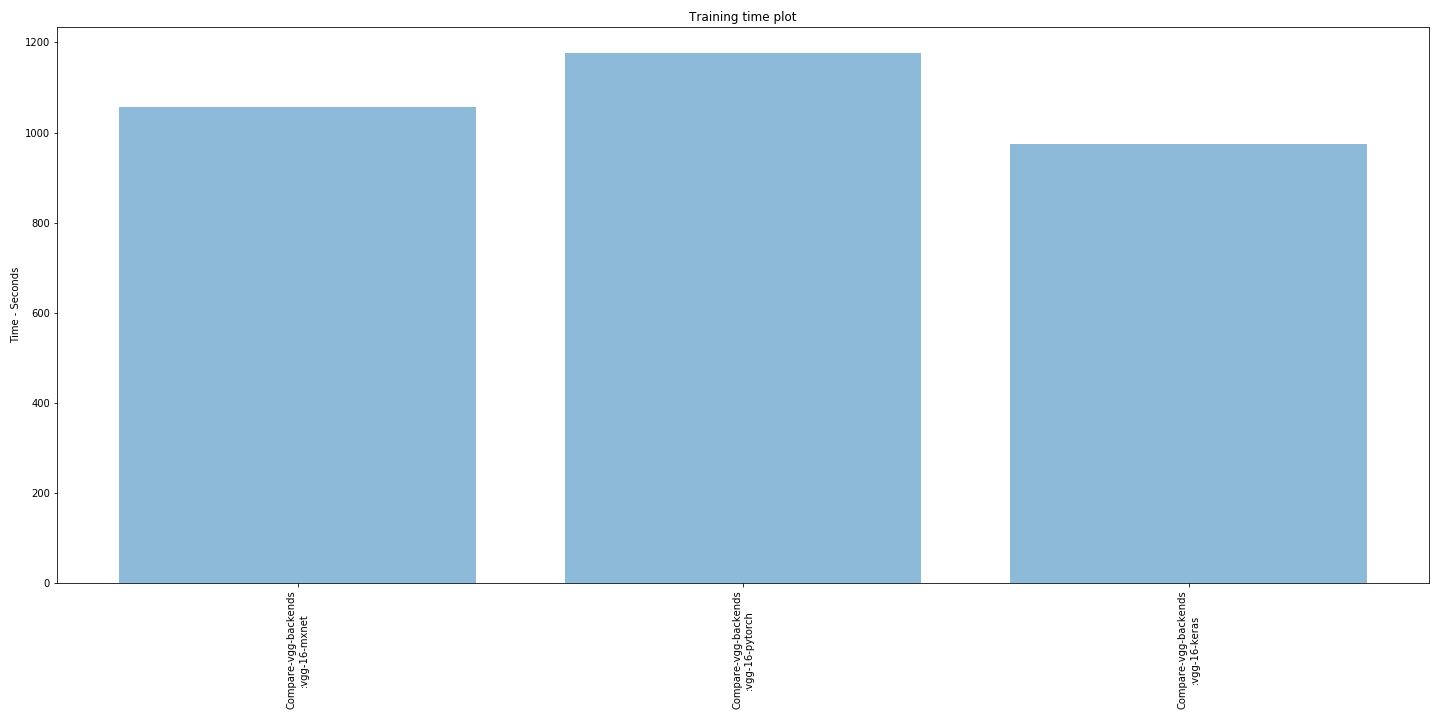

In [16]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-backend/stats_training_time.png") 

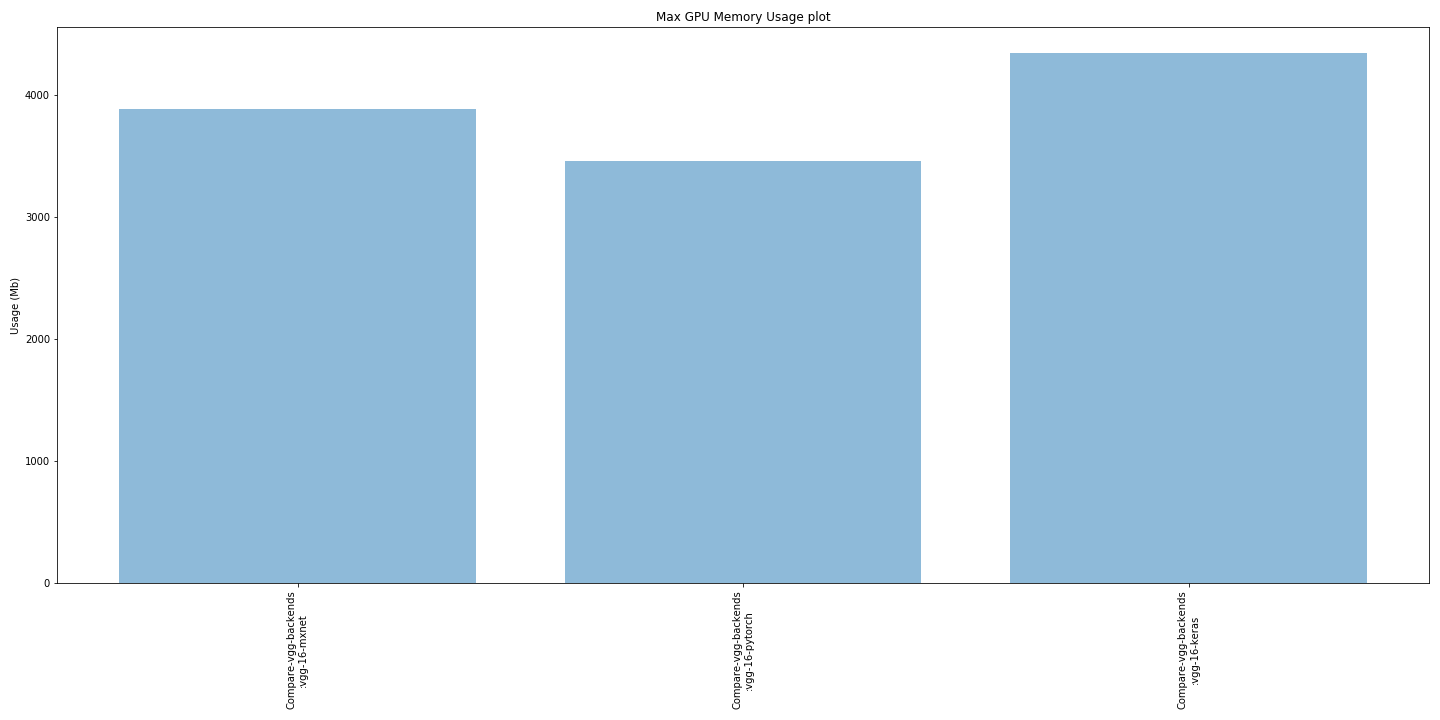

In [17]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-backend/stats_max_gpu_usage.png") 

# Comparisons 
#### You may get differet results

    Backend  |   Val Acc   | Training time (sec)  |  Gpu Usage (mb)   
    
    
    mxnet    |    93.03    |        1050          |       3900
    
    
    
    pytorch  |     92.9    |        1150          |       3400
    
    
    
    
    keras    |    92.76    |        970           |       4400
    
    
    
    